In [12]:
from sklearn.cluster import KMeans

In [13]:
import pandas as pd

In [14]:
import numpy as np

In [15]:
pd.set_option('display.max_columns', None)

In [16]:
c_data=pd.read_excel('Crowdfunding_data_1000_projects.xlsx')

In [17]:
c_data

,Project_ID,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,Goal,students_reached,total_donations,num_donors,funding_status,date_posted,date_expiration
0,1,45.310140,-93.807736,Monticello,MN,55362,NaN,Monticello Ind School Dist 882,Wright,f,f,f,f,f,f,Ms.,f,f,Literacy,Literacy & Language,Special Needs,Special Needs,Technology,moderate poverty,Grades PreK-2,887.15,12,856.83,7,completed,2015-01-01 00:00:00,2015-05-01 00:00:00
1,2,29.795216,-95.358101,Houston,TX,77009,urban,Houston Ind School District,Harris,f,f,f,f,f,f,Teacher,f,f,Literature & Writing,Literacy & Language,NaN,NaN,Books,highest poverty,Grades 3-5,761.52,63,125.00,3,NotCompleted,2015-01-01 00:00:00,2015-04-30 00:00:00
2,3,37.754852,-122.426160,San Francisco,CA,94114,urban,San Francisco Unified Sch Dist,San Francisco,t,f,f,f,f,f,Mrs.,f,f,Gym & Fitness,Health & Sports,Health & Wellness,Health & Sports,Supplies,highest poverty,Grades PreK-2,266.55,88,266.56,6,completed,2015-01-01 00:00:00,2015-05-01 00:00:00
3,4,36.297083,-119.789619,Lemoore,CA,93245,suburban,Lemoore Union Elem Sd,Kings,f,f,f,f,f,f,Ms.,f,f,Health & Wellness,Health & Sports,Gym & Fitness,Health & Sports,Supplies,high poverty,Grades 3-5,808.15,30,25.00,1,NotCompleted,2015-01-01 00:00:00,2015-04-30 00:00:00
4,5,33.946010,-118.223360,South Gate,CA,90280,suburban,Los Angeles Unif Sch Dist,Los Angeles,f,f,f,f,f,f,Ms.,f,f,Music,Music & The Arts,Performing Arts,Music & The Arts,Other,high poverty,Grades 9-12,1296.65,92,1296.65,1,NotCompleted,2015-01-01 00:00:00,2015-05-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,27.712243,-97.425700,Corpus Christi,TX,78415,urban,Corpus Christi Ind Sch Dist,Nueces,f,f,f,f,f,f,Ms.,f,f,Early Development,Applied Learning,Character Education,Applied Learning,Supplies,highest poverty,Grades PreK-2,168.40,20,168.40,2,completed,2015-01-05 00:00:00,2015-05-04 00:00:00
996,997,35.957050,-80.019836,High Point,NC,27262,urban,Guilford Co Schools,Guilford,f,f,f,f,f,f,Mrs.,f,f,Health & Life Science,Math & Science,NaN,NaN,Supplies,highest poverty,Grades 6-8,355.07,100,355.08,5,completed,2015-01-05 00:00:00,2015-05-05 00:00:00
997,998,42.156029,-71.565903,Dorchester,MA,2124,NaN,Boston Public School District,Suffolk,f,f,f,f,f,f,Mrs.,f,f,Applied Sciences,Math & Science,Special Needs,Special Needs,Supplies,highest poverty,Grades 6-8,1110.75,75,1083.40,19,completed,2015-01-05 00:00:00,2015-05-04 00:00:00
998,999,42.926026,-85.626478,Grand Rapids,MI,49506,urban,Grand Rapids Pub Sch Dist,Kent,f,t,f,f,f,f,Mr.,f,f,Special Needs,Special Needs,History & Geography,History & Civics,Technology,highest poverty,Grades 9-12,2392.41,15,556.00,8,NotCompleted,2015-01-05 00:00:00,2015-05-05 00:00:00


In [18]:
selected_columns=c_data[['Goal','students_reached', 'funding_status']]

In [19]:
selected_columns=selected_columns.replace({"funding_status":{"completed":0,"NotCompleted":1}})

C:\Users\cobbl\AppData\Local\Temp\ipykernel_14776\1302372710.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selected_columns=selected_columns.replace({"funding_status":{"completed":0,"NotCompleted":1}})


In [20]:
selected_columns

,Goal,students_reached,funding_status
0,887.15,12,0
1,761.52,63,1
2,266.55,88,0
3,808.15,30,1
4,1296.65,92,1
...,...,...,...
995,168.40,20,0
996,355.07,100,0
997,1110.75,75,0
998,2392.41,15,1


In [22]:
from sklearn.model_selection import train_test_split

In [25]:
train, test = train_test_split(selected_columns, test_size=0.25)

In [26]:
train

,Goal,students_reached,funding_status
389,1468.24,65,0
596,398.05,650,1
413,231.07,30,1
505,554.24,28,1
601,426.33,22,0
...,...,...,...
306,714.71,120,1
368,508.84,35,0
791,1074.68,60,1
503,661.75,15,1


In [27]:
test

,Goal,students_reached,funding_status
420,504.04,30,1
693,863.84,60,1
200,2328.00,16,1
129,292.54,10,0
514,293.45,130,0
...,...,...,...
973,511.12,21,0
978,1470.36,40,1
175,498.61,18,0
595,389.69,100,0


In [29]:
import matplotlib.pyplot as plt

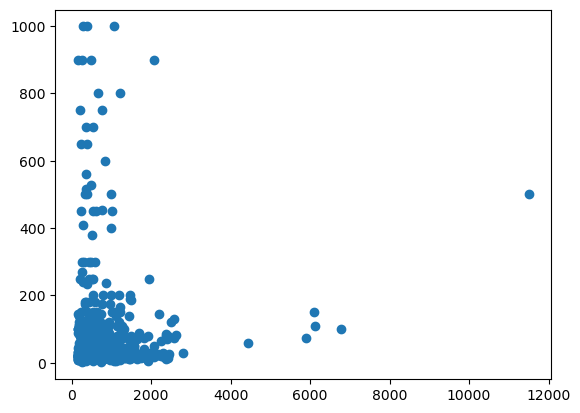

In [37]:
plt.scatter(train[['Goal']], train[['students_reached']])

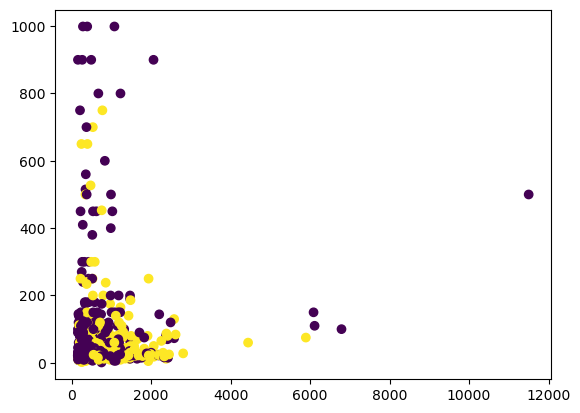

In [38]:
plt.scatter(train[['Goal']], train[['students_reached']],c=np.array(train[['funding_status']]))

In [39]:
kmeans = KMeans(n_clusters=2).fit(train[['Goal', 'students_reached']])

C:\Users\cobbl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [40]:
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

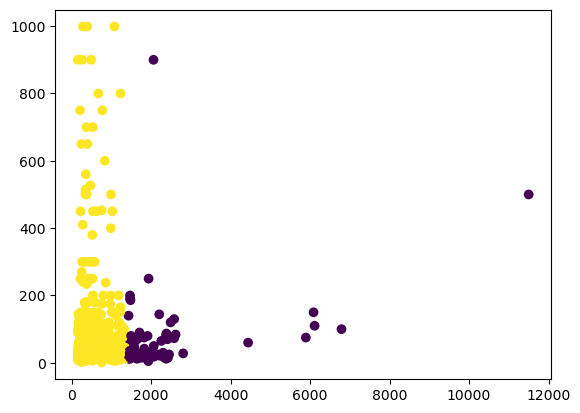

In [41]:
plt.scatter(train[['Goal']], train[['students_reached']],c=np.array(kmeans.labels_))

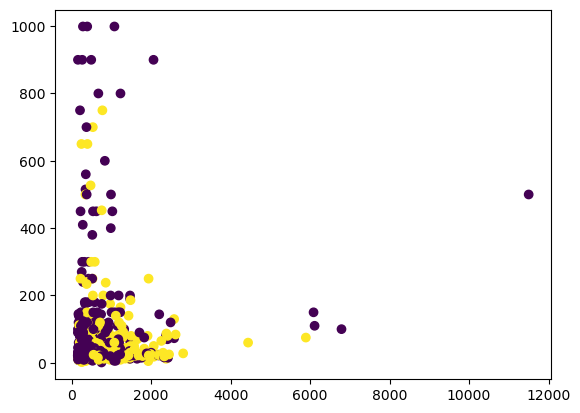

In [42]:
plt.scatter(train[['Goal']], train[['students_reached']],c=np.array(train[['funding_status']]))

In [43]:
predicted_labels=kmeans.predict(test[['Goal', 'students_reached']])

In [44]:
predicted_labels

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1])

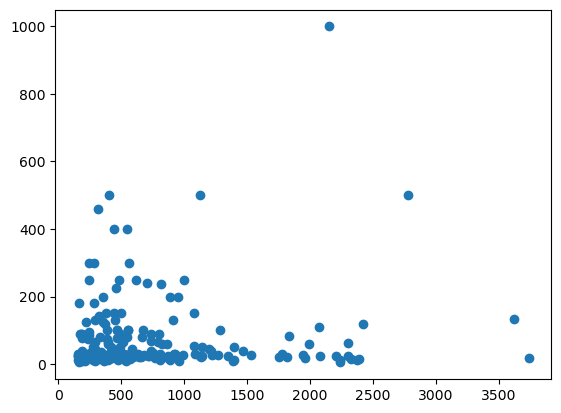

In [46]:
plt.scatter(test[['Goal']], test[['students_reached']])

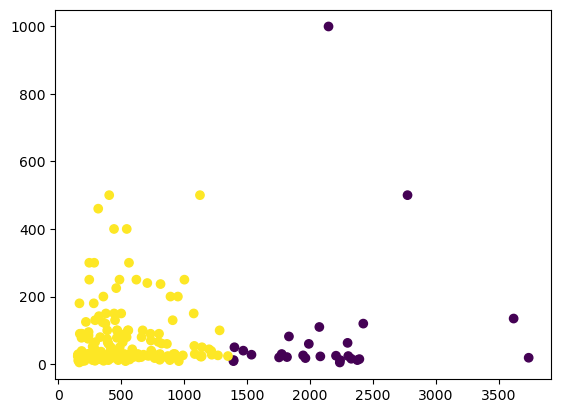

In [45]:
plt.scatter(test[['Goal']], test[['students_reached']], c=np.array(predicted_labels))